<a href="https://colab.research.google.com/github/katia-kitaguti/ab-testing-game/blob/main/202407%7CA_B_Testing_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Settings

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from google.colab import userdata
import os

from scipy.stats import shapiro
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.environ["My_Key"] = userdata.get('My_Key')
os.environ["User_Name"] = userdata.get('User_Name')

In [3]:
!kaggle datasets download -d yufengsui/mobile-games-ab-testing

Dataset URL: https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing
License(s): unknown
mobile-games-ab-testing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
! unzip "mobile-games-ab-testing.zip"

Archive:  mobile-games-ab-testing.zip
replace cookie_cats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# 1. Base &  Data Treatments

In [5]:
df_games = pd.read_csv('cookie_cats.csv', sep=',')
df_games

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [6]:
df_games.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

By looking at the results from the code line above, there is no null values in the columns.

# Exploratory Data Analysis (EDA)

In [7]:
df_games.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In this dataset, we have 90,189 entries.

Through the code line above, we can see that:
- 50% of users played below or equal to 16 game rounds.
- Since the standard deviation is too high, we can see some outliers.


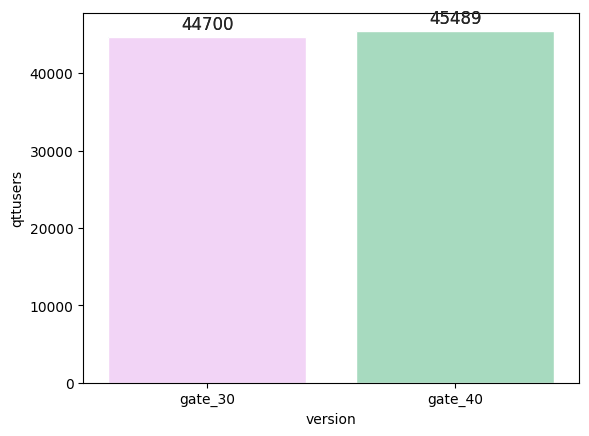

In [8]:
df_version_agg = df_games.groupby('version').agg(qttusers =('userid','count'))
sns.barplot(df_version_agg, x='version', y='qttusers', ci=None)
sns.set(style="whitegrid")
palette = {'gate_30': '#F6CEFC', 'gate_40': '#9FE2BF'}
ax = sns.barplot(data=df_version_agg, x='version', y='qttusers', ci=None, palette=palette)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

#2. Statistical Tests

### Shapiro-Wilk Test

- This statistical test is used to check whether the given data sample comes from a normal distribution
- H0 is assuming that it is a normal distribution

In [9]:
df_games_gate30 = df_games[df_games['version']=='gate_30']
df_games_gate40 = df_games[df_games['version']=='gate_40']

In [10]:
shapiro_list_results = []

test_gate30_stat, p_value_gate30 = shapiro(df_games_gate30['sum_gamerounds'])

shapiro_list_results.append({'Version':'Gate_30', 'Test Statistic':test_gate30_stat, 'P-Value': p_value_gate30} )

test_gate40_stat, p_value_gate40 = shapiro(df_games_gate40['sum_gamerounds'])

shapiro_list_results.append({'Version':'Gate_40', 'Test Statistic':test_gate40_stat, 'P-Value': p_value_gate40} )

df_shapiro_list_results = pd.DataFrame(shapiro_list_results)
df_shapiro_list_results

,Version,Test Statistic,P-Value
0,Gate_30,0.088051,0.0
1,Gate_40,0.482566,0.0


Through the code line above:

- p-value < 0.05 in both: we rejected the H0 hypothesis of the normal distribution. So, they are not normally distributed.

### T-Test

- This statistical test compares two samples to see if they are significantly different from each other
- It measures the difference in means relative to the variation of the data
- The null hypothesis means that there is no difference between the means of these 2 groups.

In [11]:
t_stat, p_value = ttest_ind(df_games_gate30['sum_gamerounds'], df_games_gate40['sum_gamerounds'])

t_stat, p_value

(0.8910426211362967, 0.37290868247405207)

Assuming that alpha = 0.05

By the results above:

Since p-value > alpha, we failed to reject the H0 hypothesis, so there is no evidence for null hypothesis. Maybe there isn`t a difference between these two groups.

# Conclusion

Since we got p_value > 0.05, H0 cannot be reject, so there is no significant difference between users who played gate 30 and gate 40.